In [12]:
#Análisis Exploratorio de Datos - Rotación de Clientes de Telecomunicaciones
#Ignacio Antillanca
#14-06-2025

#importación librerias
import pandas as pd
import matplotlib.pyplot as plt

#carga de data set desde drive
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/DataSet/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(ruta)
#validar carga correcta
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
#identificación de duplicados
duplicados = df.duplicated()
if duplicados.any():
    print("Datos duplicados: ", duplicados.sum())
else:
    print("Sin datos duplicados")

Sin datos duplicados


In [7]:
#verificar tipos de datos del data set para detectar inconsistencias
df.dtypes

#se detecta columna TotalCharges como object y contiene números decimales, se transfomara a float y forzando errores
try:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print("Conversión realizada con éxito.")

    #contar cuántos quedaron como NaN
    total = df['TotalCharges'].isna().sum()
    print("Valores nulos: ", total)

except Exception as e:
    print("Ocurrió un error durante la conversión:", e)

#se detecta columna SeniorCitizen valores 0 o 1, se transforma a tipo categorico 0 = No 1 = Si
#como apoyo a analisis exploratorio
try:
    df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
    print("Conversión de SeniorCitizen a 'category' realizada con éxito.")
    print("Nuevo tipo de dato:", df['SeniorCitizen'].dtype)

except Exception as e:
    print("Ocurrió un error durante la conversión de SeniorCitizen:", e)

Conversión realizada con éxito.
Valores nulos:  11


In [8]:
#se detectan 11 valores que faltan en columna ToTalCharges, se rellenaran con datos segun la media de otros valores de la columna
try:
    media_totalcharges = df['TotalCharges'].median()
    df['TotalCharges'] = df['TotalCharges'].fillna(media_totalcharges)

    #verificar nuevamente valores nulos
    nulos = df['TotalCharges'].isna().sum()
    print("Valores nulos en TotalCharges:", nulos)

except Exception as e:
    print("Ocurrió un error en llenado de datos: ", e)


Valores nulos en TotalCharges: 0


In [9]:
#verificar si existen valores vacios en todo el dataset
vacios = df.isna().sum()
if vacios.any():
    print("Datos faltantes: ", df.isna().sum())
else:
    print("Sin datos faltantes")

Sin datos faltantes


In [10]:
#verificar valores categóricos inconsistentes

columnas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

for col in columnas:
    print(f"\nValores únicos en la columna '{col}':")
    print(df[col].unique())


Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['No' 'Yes']

Valores únicos en la columna 'PhoneService':
['No' 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service' 'No' 'Yes']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'TechSupport':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'StreamingTV':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'Contract':
['Month-to-month' 'One year' 'Two year']

Valores únicos en la columna 'PaperlessB

In [ ]:
#Solo ejecutar bloque si hay columnas que necesiten ser corregidas del paso anterior.
#selimina espacios en blancos
#conversion a minusculas

#['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

normalizar = [''] #agregar columna

for col in normalizar:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [11]:
#detectar valores extremos o fuera de rango segun interpretacion de las columnas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Conclusion limpieza:

Se completó la etapa de limpieza del dataset. Se eliminaron filas duplicadas y se corrigieron los tipos de datos, en particular la columna TotalCharges, que fue convertida a tipo numérico. Se estandarizaron los valores categóricos para mantener coherencia entre mayúsculas y minúsculas. Además, se identificaron y trataron valores faltantes según el tipo de dato. Finalmente, se corrigieron registros inusuales o erróneos. El dataset ahora está limpio y estructurado para iniciar el análisis exploratorio (EDA).

#Visualicaciones:

Univariada 1: distribución clientes según genero \
analizar el género de los clientes para conocer mejor la base de usuarios y detectar si existe algún sesgo de género que pueda influir en la rotación o en decisiones comerciales.

Univariada 2: analizar la variable 'MonthlyCharges' de forma individual permite conocer la estructura de precios en los que se encuentran la mayoría de los clientes para posterior cruce con abandono y detectar relaciones.

Multivariada 1: Se decidió analizar la variable 'MonthlyCharges' en función del abandono dado que el monto mensual que paga un cliente puede estar relacionado con su permanencia.

Multivariada 2:  contrato y Rotación \
cruzar el tipo de contrato con la rotación para detectar si hay una relación
entre la duración del contrato y la fidelidad del cliente. Es relevante para entender si los contratos a plazo fijo retienen mejor a los clientes o si los contratos mensuales presentan mayor tasa de rotación.

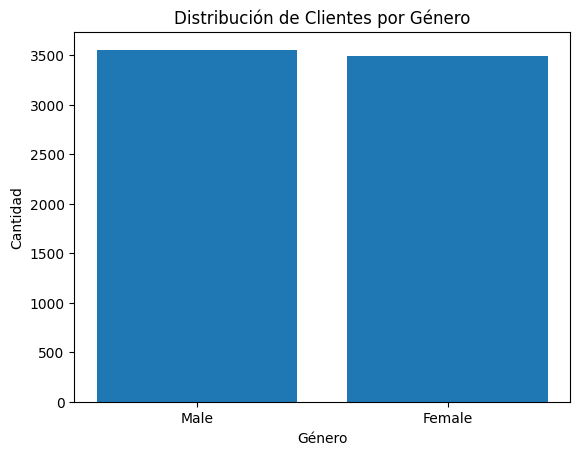

In [14]:
#Visualizaciones univariadas y multivariadas

#1.- univariada: identificar distribución clientes según genero
conteo = df['gender'].value_counts()

plt.bar(conteo.index, conteo.values)
plt.title("Distribución de Clientes por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

#se observa que la cantidad de clientes está balanceada entre hombres y mujeres, esto indica que la empresa tiene una cobertura en partes iguales en cuanto al género, lo cual es positivo para diseñar estrategias inclusivas.
#esta información también servirá para detectar, si alguno de los grupos tiene una mayor tendencia a abandonar el servicio.
#apoyo a orientar futuras campañas de recaptación o retención al detectar variación

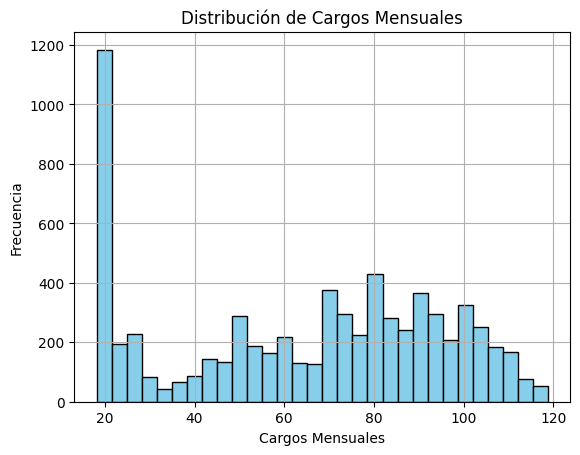

In [17]:
#2.- univariada: histograma de MonthlyCharges
plt.hist(df['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Cargos Mensuales")
plt.xlabel("Cargos Mensuales")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

#la mayoría de los clientes tiene cargos mensuales entre 20 y 100, lo cual indica que la base de clientes se centra en planes de precio medio.
#esta distribución será útil más adelante para cruzarla con la variable de abandono y determinar si los clientes que pagan más tienen mayor probabilidad de dejar el servicio.
#apoyo a orientar ajuste de precios o promociones en segmentos de menor participación

<ipython-input-22-2059647167>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([churn_no, churn_yes], labels=['No', 'Yes'])


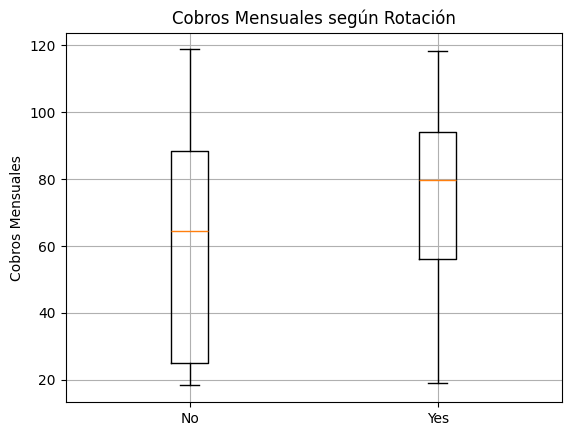

In [22]:
#1.- multivariada: gráfico de caja cargos Mensuales según Rotación
churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

plt.boxplot([churn_no, churn_yes], labels=['No', 'Yes'])
plt.title("Cobros Mensuales según Rotación")
plt.ylabel("Cobros Mensuales")
plt.grid(True)
plt.show()

#se observa que los clientes que abandonan tienden a tener cargos mensuales más altos, en comparación con los que se quedan y la media de sus pagos es superior
#esto sugiere que clientes con planes más costosos o con más servicios contratados podrían estar menos satisfechos,

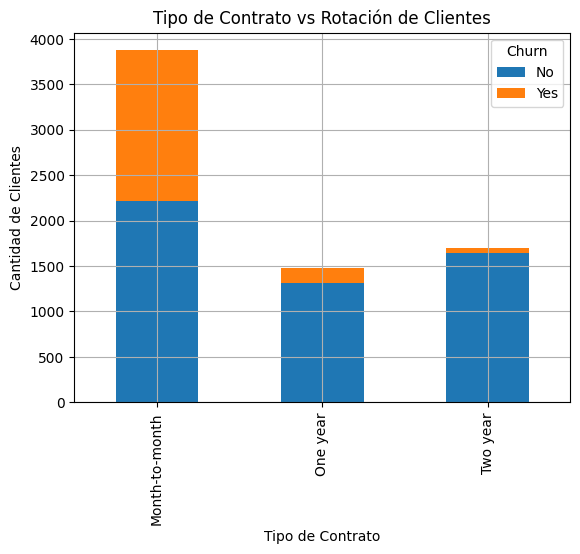

In [23]:
#2.- multivarada: contrato y rotacion
contrato = pd.crosstab(df['Contract'], df['Churn'])

contrato.plot(kind='bar', stacked=True)
plt.title("Tipo de Contrato vs Rotación de Clientes")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.grid(True)
plt.legend(title="Churn")
plt.show()

#los contratos mensuales tienen una proporción mayor de clientes que abandonan, mientras que los contratos a uno o dos años muestran menor rotación.
#esto indica que los clientes con compromisos de más largo plazo tienden a permanecer en la empresa, por lo que fomentar este tipo de contratos puede ser una estrategia efectiva de retención.

Como paso siguiente, se podrían aplicar modelos de predicción de rotación y explorar más a fondo qué características influyen en la decisión de los clientes de dejar el servicio.